In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
     

In [2]:
df = pd.read_csv('raw.githubusercontent.com_alexeygrigorev_mlbookcamp-code_master_chapter-02-car-price_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
selected_columns = ['Make', 
                    'Model',
                    'Year',
                    'Engine HP',
                    'Engine Cylinders',
                    'Transmission Type',
                    'Vehicle Style',
                    'highway MPG',
                    'city mpg',
                    'MSRP']

df = df[selected_columns]
df.head(2)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make', 'model', 'transmission_type', 'vehicle_style']

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [8]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
# Fill in the missing values of the selected features with 0.
df.fillna(0, inplace=True)

df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [10]:
# Rename MSRP variable to price
df.rename(columns = {'msrp': 'price'}, inplace=True)
df.head(1)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135


In [11]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

### Correlation calculation

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [13]:
# using numeric dataset

df_numeric = df.copy()
df_numeric = df.drop(["make", "model", 'transmission_type', 'vehicle_style'], axis=1)
df_numeric.describe()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


In [14]:
df_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


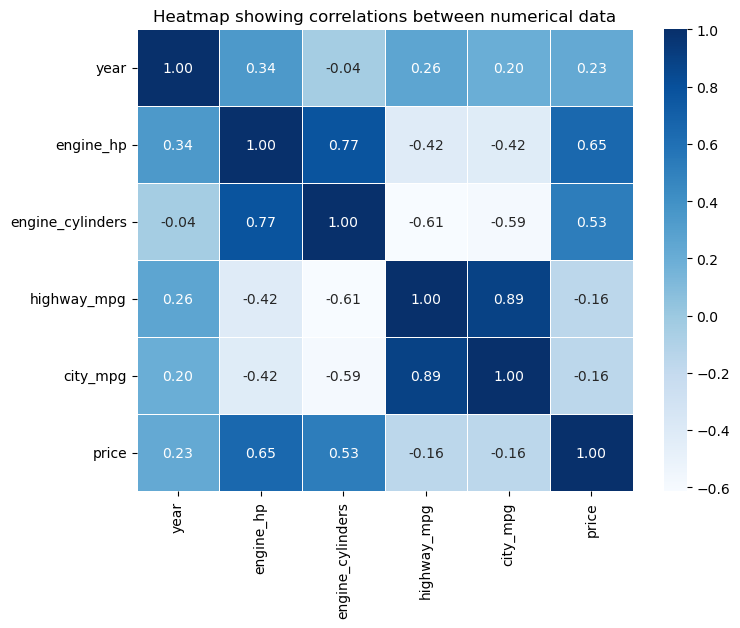

In [15]:
plt.figure(figsize=(8, 6))  
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap showing correlations between numerical data')
plt.show()

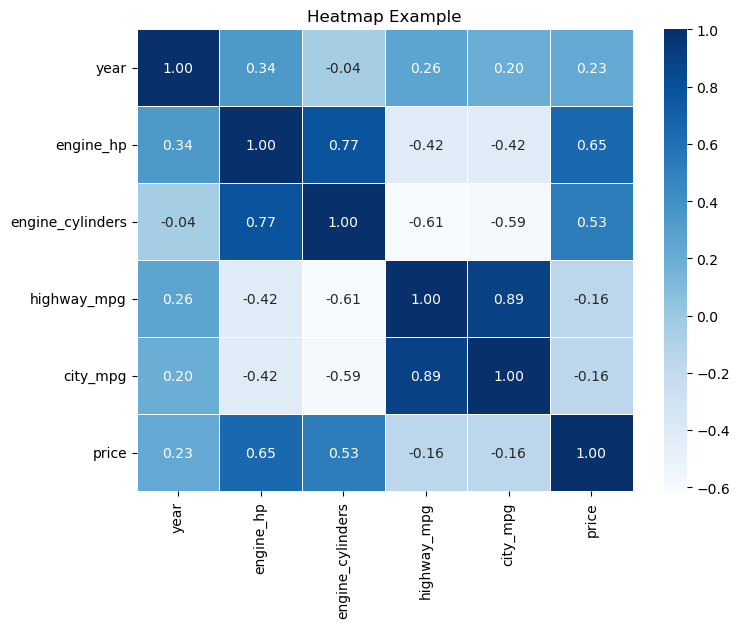

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap Example')

plt.show()

In [17]:
#  features that have the biggest correlation
df_numeric.corr().unstack().sort_values(ascending = False)[6:8]

city_mpg     highway_mpg    0.886829
highway_mpg  city_mpg       0.886829
dtype: float64

In [19]:
df_class = df.copy()

# turn the price variable from numeric into a binary format.
#  create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

# Calculate the mean price
mean_price = df_class['price'].mean()

# Create the 'above_average' binary variable
df_class['above_average'] = (df_class['price'] > mean_price).astype(int)

# drop price column
df_class = df_class.drop('price', axis = 1)

# Display the updated DataFrame
df_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


## Setting up the validation framework
Perform the train/validation/test split with Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into train (60%), validation (20%), and test (20%) sets
df_train_full, df_test = train_test_split(df_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)  # 20/80 = 0.25


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Display the shapes of the resulting sets
print("Train set:", df_train.shape, y_train.shape)
print("Validation set:", df_val.shape, y_val.shape)
print("Test set:", df_test.shape, y_test.shape)



Train set: (7148, 10) (7148,)
Validation set: (2383, 10) (2383,)
Test set: (2383, 10) (2383,)


In [21]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Mutual Information

In [22]:
# mutual information score between above_average and other categorical variables in our dataset. Use the training set only

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

numerical = ['model', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [23]:
from sklearn.metrics import mutual_info_score

def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_train_full.above_average)

mi = df_train_full[categorical].apply(mutual_info_above_average_score).round(2)
mi.sort_values(ascending = False).to_frame(name='MI')

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


### Logistic Regression

In [24]:
from sklearn.feature_extraction import DictVectorizer

# transforming the dataset
train_dict = df_train[categorical + numerical].to_dict(orient='records')

# vectorizing the dataset
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3529571382.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[categorical + numerical].to_dict(orient='records')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3529571382.py:10: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[categorical + numerical].to_dict(orient='records')


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training Logistic Regression Model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Initializing the Model Prediction
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

# Inspecting the Accuracy
accuracy = np.round(accuracy_score(y_val, y_pred),2);
print('Accuracy = ', accuracy);

Accuracy =  0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\222135787.py:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[categorical + numerical].to_dict(orient='records')


### Feature Elimination

In [26]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'model',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calculate the original accuracy score using all features
orig_score = accuracy

# Iterate over each feature in the 'features' list
for c in features:
    # Create a subset of features by removing the current feature 'c'
    subset = features.copy();
    subset.remove(c);
    
    # Prepare the training data by converting it to a dictionary of records
    train_dict = df_train[subset].to_dict(orient='records');

    # Create and fit a DictVectorizer to transform the training data
    dv = DictVectorizer(sparse=False);
    dv.fit(train_dict);

    # Transform the training data into a format suitable for logistic regression
    X_train = dv.transform(train_dict);

    # Initialize and train a logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42);
    model.fit(X_train, y_train);

    # Prepare the validation data by converting it to a dictionary of records
    val_dict = df_val[subset].to_dict(orient='records');

    # Transform the validation data using the same DictVectorizer
    X_val = dv.transform(val_dict);

    # Make predictions on the validation data
    y_pred = model.predict(X_val);

    # Calculate the accuracy score for the model's predictions on the validation set
    score = accuracy_score(y_val, y_pred);
    
    # Calculate the change in accuracy score when the current feature is removed
    accuracy_difference = orig_score - score
    
    # Print the feature name, accuracy difference, and the new accuracy score
    print(f"Removed feature: {c}, Accuracy Difference: {accuracy_difference:.2f}, New Accuracy: {score:.2f}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');


Removed feature: make, Accuracy Difference: 0.01, New Accuracy: 0.94
Removed feature: model, Accuracy Difference: 0.00, New Accuracy: 0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');


Removed feature: transmission_type, Accuracy Difference: 0.00, New Accuracy: 0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');


Removed feature: vehicle_style, Accuracy Difference: 0.01, New Accuracy: 0.94
Removed feature: model, Accuracy Difference: 0.00, New Accuracy: 0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');


Removed feature: engine_hp, Accuracy Difference: 0.02, New Accuracy: 0.93


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');


Removed feature: engine_cylinders, Accuracy Difference: 0.00, New Accuracy: 0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');
C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:15: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[subset].to_dict(orient='records');


Removed feature: highway_mpg, Accuracy Difference: 0.00, New Accuracy: 0.95
Removed feature: city_mpg, Accuracy Difference: 0.00, New Accuracy: 0.95


C:\Users\DELL\AppData\Local\Temp\ipykernel_17964\3646999669.py:29: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dict = df_val[subset].to_dict(orient='records');


In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Apply a logarithmic transformation to the 'price' column
df['price'] = np.log1p(df['price'])


# Split the data into training and validation sets
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values
     
del df_train['price']
del df_val['price']
del df_test['price']
       

### Ridge Regression

In [31]:
# Initialize a dictionary to store RMSE scores for different alpha values
rmse_scores = {}

# Define the alpha values to test
alpha_values = [0, 0.01, 0.1, 1, 10]


# Fit Ridge regression models with different alpha values
for alpha in alpha_values:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the validation set and transform the predictions back from log scale
    y_pred = model.predict(X_val)
    
    # Calculate the RMSE and round it to 3 decimal digits
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores[alpha] = round(rmse, 3)

# Display the RMSE scores for different alpha values
for alpha, rmse in rmse_scores.items():
    print(f"Alpha = {alpha}: RMSE = {rmse}")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha = 0: RMSE = 0.678
Alpha = 0.01: RMSE = 0.678
Alpha = 0.1: RMSE = 0.678
Alpha = 1: RMSE = 0.678
Alpha = 10: RMSE = 0.679


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
